# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [5]:
np.random.seed(47)
n_rep = 10000
 
bootsample_mean = np.empty(N_rep)    
    
for _ in range(n_rep):
    # Generate bootstrap sample: bs_sample
    bootsample_mean[_] = np.mean(np.random.choice(med_charges.charges, size=len(med_charges.charges)))

bootsample_95 = np.percentile(bootsample_mean, [2.5, 97.5])

print(bootsample_95)

[12624.86211913 13918.00929997]


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

- H0 = Standard deviation in medical charges is same for insured and non-insured.
- Ha = Standard deviation in medical charges is not same for insured vs non-insured.

There is not sufficient evidence to reject the null hypothesis as the 95% confidence interval contains a zero difference in standard deviation.

In [6]:
def diff_of_std(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of std of data_1, data_2: diff
    diff = np.std(data_1) - np.std(data_2)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2)) # tuple

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [7]:
# get medical charges for with and no insurance
with_ins = med_charges.loc[med_charges['insuranceclaim'] == 1].charges
no_ins  = med_charges.loc[med_charges['insuranceclaim'] == 0].charges

with_ins_std = np.std(with_ins)
no_ins_std = np.std(no_ins)

print('std for with insurance = ' + str(with_ins_std) + ', no insurance= ' + str(no_ins_std))

std for with insurance = 14036.956250260411, no insurance= 6440.699841605233


In [9]:
np.random.seed(47)
n_rep = 100
 
bootsample_std_diff = np.empty(n_rep)    
 
# Generate bootstrap sample: bs_sample
bootsample_std_diff = draw_perm_reps(with_ins, no_ins, diff_of_std, n_rep)

Standard deviation difference mean: 93.53120070610254
95% percentile: lower -1145.8810475085568, upper 1376.8433407492817


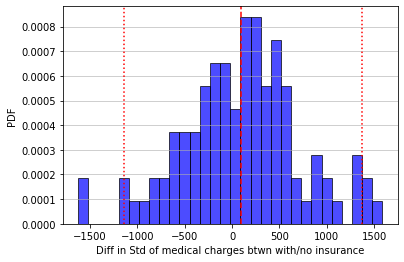

In [18]:
bootsample_std_diff = np.sort(bootsample_std_diff)
bootsample_std_mean = np.mean(bootsample_std_diff)

bootsample_std_perc_95 = np.percentile(bootsample_std_diff, [2.5, 97.5])

print('Standard deviation difference mean: ' + str(bootsample_std_mean))
print('95% percentile: lower ' + str(bootsample_std_perc_95[0]) + ', upper ' + str(bootsample_std_perc_95[1]))

_ = plt.hist(bootsample_std_diff, bins=30, density=True, histtype='bar', color='blue', alpha=0.7, ec='black')
_ = plt.grid(axis='y', alpha=0.75)
_ = plt.xlabel('Diff in Std of medical charges btwn with/no insurance')
_ = plt.ylabel('PDF')
_ = plt.axvline(bootsample_std_mean, color='r', linestyle='--')
_ = plt.axvline(bootsample_std_perc_95[0], color='r', linestyle=':') 
_ = plt.axvline(bootsample_std_perc_95[1], color='r', linestyle=':') 
plt.show()

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and ___reject the null hypothesis___ if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [21]:
# get medical charges for with and no insurance
has_ins = med_charges.loc[med_charges['insuranceclaim'] == 1].charges
no_ins  = med_charges.loc[med_charges['insuranceclaim'] == 0].charges

has_ins_mean = np.mean(has_ins)
no_ins_mean = np.mean(no_ins)
empirical_diff_mean = (has_ins_mean - no_ins_mean)

print('Mean for has insurance = ' + str(has_ins_mean) + ', no insurance= ' + str(no_ins_mean))
print('actual difference in Mean: ' + str(empirical_diff_mean))

Mean for has insurance = 16423.928276537663, no insurance= 8821.421892306294
actual difference in Mean: 7602.506384231368


In [22]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates 

In [24]:
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_insured = draw_bs_reps(has_ins, np.mean, size=10000)
bs_replicates_not = draw_bs_reps(has_ins, np.mean, size=10000)

# Get replicates of difference of stds: bs_replicates
bs_replicates = bs_replicates_insured - bs_replicates_not

In [25]:
# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_mean) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__
- Hard Dashed red line represents the demarcation for replicates' mean in difference between the means. 
- Soft Dotted red lines is 95% percentile.
- Black Dotted line is actual difference in mean.

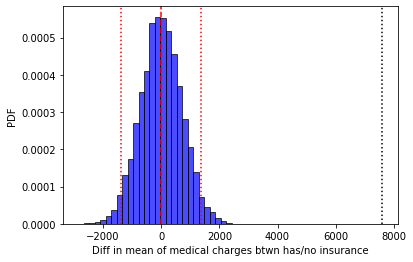

In [28]:
bootsample_mean_diff_perc_95 = np.percentile(bs_replicates, [2.5, 97.5])
bootsample_mean_diff_mean = np.mean(bs_replicates)

_ = plt.hist(bs_replicates, bins=30, density=True, histtype='bar', color='blue', alpha=0.7, ec='black')
_ = plt.xlabel('Diff in mean of medical charges btwn has/no insurance')
_ = plt.ylabel('PDF')
_ = plt.axvline(bootsample_mean_diff_mean, color='r', linestyle='--')
_ = plt.axvline(bootsample_mean_diff_perc_95[0], color='r', linestyle=':') 
_ = plt.axvline(bootsample_mean_diff_perc_95[1], color='r', linestyle=':') 
_ = plt.axvline(empirical_diff_mean, color='k', linestyle=':') 
plt.show()

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

___Yes, because the p-values are equal.___

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__

I would utilize the ___equal_var=False___ because the empirical sample and bootstrapped sample have different variances/standard deviations along with unequal sample sizes. 

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__

__Yes, I would most certainly perform the similar two-sided test above especially as I would be looking at centrality.__ 

- H0 = The mean clickthrough rate for A >= B (There is no difference between the two ads "A or B", and or the old one "A" is generating more click through)
- Ha = The mean clickthrough rate for A < B (The new ad "B" is generating more click through than the old one "A")

The real worl consequence of rejecting the null hypothesis would be that there is sufficient statistical evidence that B has a higher click through rate due to the new ad and there may be opportunity in continuing to utilizing the new ad.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.